In [1]:
import nltk
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import json
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from textblob import TextBlob
from matplotlib import pyplot as plt
from dateutil import parser
# import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [2]:
import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [3]:
stop_words = set(stopwords.words("english"))

In [4]:
data = pd.read_csv('reviewdata.csv')
print ("Original 'Netflix' CSV Data: \n")
data

Original 'Netflix' CSV Data: 



,DATE,REVIEW,RATING
0,12/10/21 4:50PM,Having problems playing movies on my app so I ...,neg
1,12/3/21 1:56PM,"Wow, I talked to some woman that couldn't have...",neg
2,11/30/21 3:00AM,I just chatted with a so called supervisor of ...,neg
3,10/18/21 1:52AM,LAILA ID# 3102774 has horrible customer servic...,neg
4,10/15/21 7:54AM,Not impressed at all!!!!,neg
...,...,...,...
512,8/8/09 3:48PM,Great company. Easy to deal with. Lost disk an...,pos
513,8/5/09 10:12AM,"Reps have always been courteous, knowledgeable...",pos
514,7/27/09 12:59PM,As a disabled veteran I am exempt from paying ...,pos
515,7/20/09 10:03AM,despite not having a number on the website and...,pos


In [5]:
comments = []
with open ("reviewdata.csv", "r", encoding ='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        comments.append(row)
        print (row)

['DATE', 'REVIEW', 'RATING']
['12/10/21 4:50PM', "Having problems playing movies on my app so I call customer service they were so rude to me I just got off the phone with him and ended my subscription immediately don't have time to go back and forth with an adult I'm just not that type of person hopefully in the future they can have better customer service", 'neg']
['12/3/21 1:56PM', "Wow, I talked to some woman that couldn't have cared less that I was double billed by Netflix. She just keep saying call your bank. I told her it wasn't the bank who billed me. Finally I just cancelled Netflix and got my money back.", 'neg']
['11/30/21 3:00AM', "I just chatted with a so called supervisor of Netflix the worst call I've ever had and they talk over you and don't let you talk I'm also now considering cancelling Netflix worst conversation of my life", 'neg']
['10/18/21 1:52AM', 'LAILA ID# 3102774 has horrible customer service & absolutely NO KNOWLEDGE when it comes to customers Netflix accoun

In [6]:
review = comments[0]
print (review)

['DATE', 'REVIEW', 'RATING']


In [7]:
del comments[0]
comments

[['12/10/21 4:50PM',
  "Having problems playing movies on my app so I call customer service they were so rude to me I just got off the phone with him and ended my subscription immediately don't have time to go back and forth with an adult I'm just not that type of person hopefully in the future they can have better customer service",
  'neg'],
 ['12/3/21 1:56PM',
  "Wow, I talked to some woman that couldn't have cared less that I was double billed by Netflix. She just keep saying call your bank. I told her it wasn't the bank who billed me. Finally I just cancelled Netflix and got my money back.",
  'neg'],
 ['11/30/21 3:00AM',
  "I just chatted with a so called supervisor of Netflix the worst call I've ever had and they talk over you and don't let you talk I'm also now considering cancelling Netflix worst conversation of my life",
  'neg'],
 ['10/18/21 1:52AM',
  'LAILA ID# 3102774 has horrible customer service & absolutely NO KNOWLEDGE when it comes to customers Netflix account! Pleas

In [8]:
review = comments[2][1].lower()
print (review)
blob = TextBlob(review)
sentiment = blob.sentiment
print (sentiment)

i just chatted with a so called supervisor of netflix the worst call i've ever had and they talk over you and don't let you talk i'm also now considering cancelling netflix worst conversation of my life
Sentiment(polarity=-1.0, subjectivity=1.0)


In [9]:
polarities = []
subjectivities = []
for doc in comments: 
    blob = TextBlob(doc[1])
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    polarities.append(polarity)
    subjectivities.append(subjectivity)

<function matplotlib.pyplot.show(close=None, block=None)>

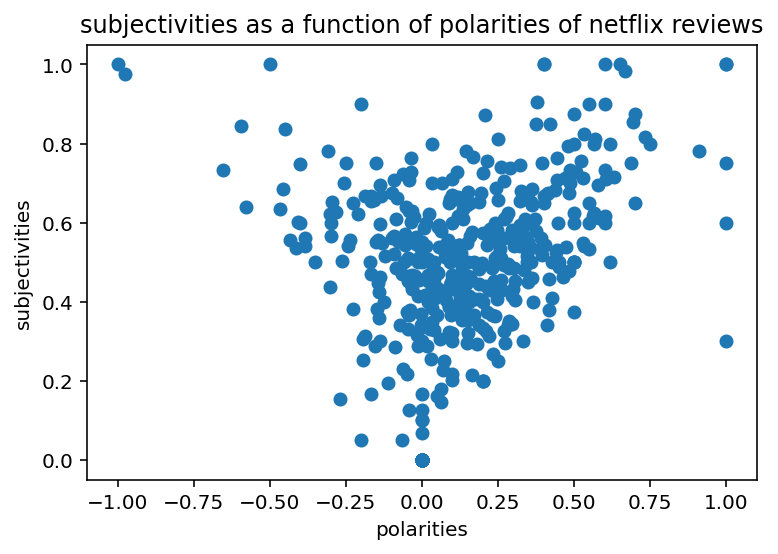

In [10]:
plt.scatter (polarities, subjectivities)
plt.xlabel ("polarities")
plt.ylabel ("subjectivities")
plt.title ("subjectivities as a function of polarities of netflix reviews")
plt.show

In [11]:
data ["SUBJECTIVITY"] = subjectivities 
data ["POLARITY"] = polarities
data1 = data
data1

,DATE,REVIEW,RATING,SUBJECTIVITY,POLARITY
0,12/10/21 4:50PM,Having problems playing movies on my app so I ...,neg,0.305000,0.060000
1,12/3/21 1:56PM,"Wow, I talked to some woman that couldn't have...",neg,0.413333,-0.013333
2,11/30/21 3:00AM,I just chatted with a so called supervisor of ...,neg,1.000000,-1.000000
3,10/18/21 1:52AM,LAILA ID# 3102774 has horrible customer servic...,neg,0.560000,-0.385000
4,10/15/21 7:54AM,Not impressed at all!!!!,neg,1.000000,-0.500000
...,...,...,...,...,...
512,8/8/09 3:48PM,Great company. Easy to deal with. Lost disk an...,pos,0.694444,0.577778
513,8/5/09 10:12AM,"Reps have always been courteous, knowledgeable...",pos,0.875000,0.700000
514,7/27/09 12:59PM,As a disabled veteran I am exempt from paying ...,pos,0.228687,-0.063838
515,7/20/09 10:03AM,despite not having a number on the website and...,pos,0.215000,0.165000


In [12]:
data ['SCORE'] = data['SUBJECTIVITY'] * data['POLARITY']
data1 = data
data1

,DATE,REVIEW,RATING,SUBJECTIVITY,POLARITY,SCORE
0,12/10/21 4:50PM,Having problems playing movies on my app so I ...,neg,0.305000,0.060000,0.018300
1,12/3/21 1:56PM,"Wow, I talked to some woman that couldn't have...",neg,0.413333,-0.013333,-0.005511
2,11/30/21 3:00AM,I just chatted with a so called supervisor of ...,neg,1.000000,-1.000000,-1.000000
3,10/18/21 1:52AM,LAILA ID# 3102774 has horrible customer servic...,neg,0.560000,-0.385000,-0.215600
4,10/15/21 7:54AM,Not impressed at all!!!!,neg,1.000000,-0.500000,-0.500000
...,...,...,...,...,...,...
512,8/8/09 3:48PM,Great company. Easy to deal with. Lost disk an...,pos,0.694444,0.577778,0.401235
513,8/5/09 10:12AM,"Reps have always been courteous, knowledgeable...",pos,0.875000,0.700000,0.612500
514,7/27/09 12:59PM,As a disabled veteran I am exempt from paying ...,pos,0.228687,-0.063838,-0.014599
515,7/20/09 10:03AM,despite not having a number on the website and...,pos,0.215000,0.165000,0.035475


In [13]:
pol_mean = data1['POLARITY'].mean()
sub_mean = data1['SUBJECTIVITY'].mean()
print ("average polarity is:")
print(pol_mean)
print ("average subjectvitiy is:")
print (sub_mean)

average polarity is:
0.12443221621332821
average subjectvitiy is:
0.44580860196105043


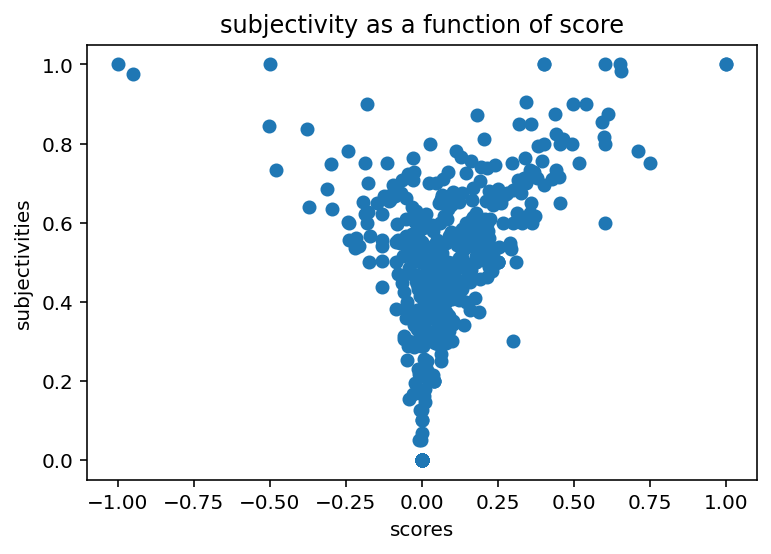

In [14]:

x = data['SCORE']
y1 = data['SUBJECTIVITY']


plt.figure()
plt.scatter(x, y1)  

plt.xlabel("scores")
plt.ylabel("subjectivities")
plt.title("subjectivity as a function of score")

plt.show()

In [15]:
data1.to_csv('NetflixFinal.csv', index=False)

In [16]:
import re

In [17]:
papers = data1
papers.head()

,DATE,REVIEW,RATING,SUBJECTIVITY,POLARITY,SCORE
0,12/10/21 4:50PM,Having problems playing movies on my app so I ...,neg,0.305000,0.060000,0.018300
1,12/3/21 1:56PM,"Wow, I talked to some woman that couldn't have...",neg,0.413333,-0.013333,-0.005511
2,11/30/21 3:00AM,I just chatted with a so called supervisor of ...,neg,1.000000,-1.000000,-1.000000
3,10/18/21 1:52AM,LAILA ID# 3102774 has horrible customer servic...,neg,0.560000,-0.385000,-0.215600
4,10/15/21 7:54AM,Not impressed at all!!!!,neg,1.000000,-0.500000,-0.500000


In [18]:
papers = papers.drop(columns=['DATE', 'SUBJECTIVITY', 'POLARITY'])
papers.head()

,REVIEW,RATING,SCORE
0,Having problems playing movies on my app so I ...,neg,0.018300
1,"Wow, I talked to some woman that couldn't have...",neg,-0.005511
2,I just chatted with a so called supervisor of ...,neg,-1.000000
3,LAILA ID# 3102774 has horrible customer servic...,neg,-0.215600
4,Not impressed at all!!!!,neg,-0.500000


In [19]:
type(data['DATE'][234])

str

In [20]:
example = "11/2/21 2:13AM"
parser.parse(example)

datetime.datetime(2021, 11, 2, 2, 13)

In [21]:
dates = list(data['DATE'].values)
dates = [parser.parse(date) for date in dates]
data['DATE'] = dates
dates = matplotlib.dates.date2num(data['DATE'])
plt.plot_date(dates, data['Polarity'])
plt.title("polarity as a function of time")
plt.ylabel('Polarity')
plt.show()

TypeError: Parser must be a string or character stream, not float

In [ ]:
def load_R_model(filename):
    with open('reviewdata.csv', 'r', encoding ='utf-8') as csvfile:
        data_input = pd.read_csv(csvfile)
    data = {'date': data_input['DATE'], 
            'review': data_input['REVIEW'],
            'rating': data_input['RATING'],
            'subjectivity': data_input['SUBJECTIVITY'],
            'polarity': data_input['POLARITY']}
    return data

In [ ]:
netflix_model_data = load_R_model('reviewdata.csv')

In [ ]:
from csv import reader

outfile = open("netflix.txt", "w")
with open('reviewdata.csv', 'r', encoding ='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        review = (row['REVIEW'])
        print (review)
        line = "{}\n".format(review)
        outfile.write(review)

In [ ]:
review = open ("netflix.txt")

In [ ]:
reviews = review.read()
reviews

In [ ]:
reviews_token = nltk.word_tokenize(reviews)
reviews_token

In [ ]:
norm = [word.lower()for word in reviews_token if word.isalpha()]
norm

In [ ]:
filtered_words = [word for word in norm if word not in stop_words]
filtered_words

In [ ]:
fw_fd = nltk.FreqDist(filtered_words)
fw_fd

In [ ]:
fw_fd.plot(15, cumulative=False)